# of ham:  4825 # of spam:  747
# of total samples:  5572


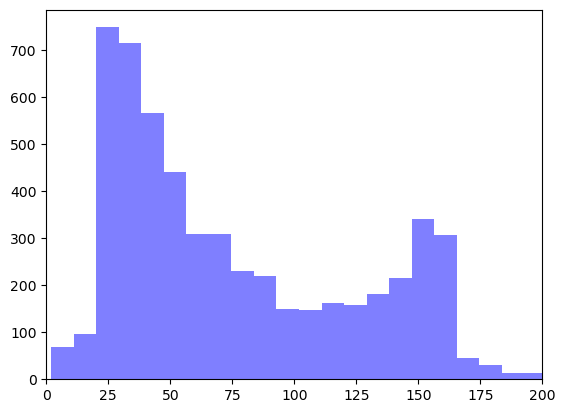

In [1]:
import pandas as pd
import numpy as np
# import matgletlib.alab as mlap
import matplotlib.pyplot as plt

# 读取spam.csv文件
df = pd.read_csv(
    "D:/CODE/Python/Machine_learning/23.10.25/spam.csv",
    encoding="latin",
)
df.head()
# 重命名数据中的V1和v2列，使得拥有很好的可读性
df.rename(columns={"v1": "Label", "v2": "Text"}, inplace=True)
df.head()
# 把'ham'和'spam'标签重命名为数字8和1
df["numLabel"] = df["Label"].map({"ham": 0, "spam": 1})
df.head()
# 统计有多少个ham，有多少个spam
print("# of ham: ", len(df[df.numLabel == 0]), "# of spam: ", len(df[df.numLabel == 1]))
print("# of total samples: ", len(df))
# 统计文本的长度信息，并画出一个histogrom
text_lengths = [len(df.loc[i, "Text"]) for i in range(len(df))]
plt.hist(text_lengths, 100, facecolor="blue", alpha=0.5)
plt.xlim([0, 200])
plt.show()

In [2]:
# 导入英文的停用词库
from sklearn.feature_extraction.text import CountVectorizer

# 构建文本的向量（基于词频的表示）
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

from sklearn.model_selection import train_test_split

# TOD01．请把数据分成训练数据和测试数据，test_size设置为0.20，random_state设置为100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("训练数据中的样本个数：", X_train.shape[0], "测试数据中的样本个数：", X_test.shape[0])
# 利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# TOD02．生成一个朴素贝叶斯分类器cLf,alpha设置为1.0,fit_prior设置为True
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

训练数据中的样本个数： 4457 测试数据中的样本个数： 1115
accuracy on test data:  0.97847533632287
